In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

train = pd.read_csv("~/Desktop/haru_5_7/data/train.csv") 
test = pd.read_csv("~/Desktop/haru_5_7/data/test.csv") 

train['target'] = 0
test['target'] = 1

categoricals = ['Country', "City"]
for c in categoricals:
    le = LabelEncoder()
    le.fit(train.append(test)[c].astype(str))
    train[c] = le.transform(train[c].astype(str))
    test[c] = le.transform(test[c].astype(str))

train_test = pd.concat([train, test], axis=0).reset_index(drop=True)

train_test = train_test.drop(columns=["id","year","month","day","lat","lon","pressure_max","pressure_min",
                                     "humidity_cnt","so2_var","so2_cnt","pressure_mid","co_cnt"])
    
train_test.head()

,Country,City,co_min,co_mid,co_max,co_var,o3_cnt,o3_min,o3_mid,o3_max,...,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid,target
0,0,24,0.749,2.590,2.633,0.850,29,2.397,4.295,5.916,...,1.088,3.101,1.983,17,7.671,10.358,15.112,13.424,19.901,0
1,0,54,2.594,3.181,4.828,1.208,49,3.092,7.572,12.332,...,3.473,7.396,10.411,62,21.324,23.813,24.221,2.021,13.741,0
2,0,146,1.190,1.197,2.200,0.248,123,0.736,12.527,23.432,...,2.107,8.089,15.719,22,10.309,13.133,15.422,6.355,25.918,0
3,0,176,4.586,11.044,14.802,24.186,90,1.917,14.141,38.374,...,0.503,3.592,2.485,116,7.146,10.685,13.344,9.417,174.370,0
4,0,193,4.689,8.681,11.100,10.011,83,0.349,2.349,38.600,...,0.755,3.396,1.937,93,1.091,3.277,12.272,4.109,167.063,0


In [38]:
from sklearn.model_selection import cross_validate
df = train_test.drop(columns=['pm25_mid'])
features = df.columns

# 交差検証には、StratifiedKFold を使用
# 分類には LightGBM を使用
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
clf = lgb.LGBMClassifier(n_estimators=100,
                         random_state=1)
score = cross_validate(clf, df[features], df['target'], cv=skf)

# Cross Validation 結果を表示
print('Accuracy : {:.1f}%'.format(score['test_score'].mean()*100))

Accuracy : 100.0%


In [39]:
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold

params = {'objective': 'binary',
          'max_depth': 5,
          'boosting': 'gbdt',
          'metric': 'auc'}

features = [col for col in train_test.columns if col not in ('target',)]
oof_pred = np.zeros((len(train_test), ))
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(cv.split(train_test, train_test['target'])):
    x_train, x_predict = train_test[features].iloc[train_idx], train_test[features].iloc[val_idx]
    y_train = train_test['target'][train_idx]

    train_set = lgb.Dataset(x_train, label=y_train)

    model = lgb.train(params, train_set)
    oof_pred[val_idx] = model.predict(x_predict).reshape(oof_pred[val_idx].shape)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 42808, number of negative: 156752
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011991 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10223
[LightGBM] [Info] Number of data points in the train set: 199560, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.214512 -> initscore=-1.297940
[LightGBM] [Info] Start training from score -1.297940
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 42807, number of negative: 156753
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10225
[LightGBM] [Info] Number of data points in the train set: 199560, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.214507 -> initscore=-1.297970
[LightGBM] [Info] Start training from score -1.297970
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 42807, number of negative: 156753
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10224
[LightGBM] [Info] Number of data points in the train set: 199560, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.214507 -> initscore=-1.297970
[LightGBM] [Info] Start training from score -1.297970
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 42807, number of negative: 156753
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10223
[LightGBM] [Info] Number of data points in the train set: 199560, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.214507 -> initscore=-1.297970
[LightGBM] [Info] Start training from score -1.297970
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 42807, number of negative: 156753
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10220
[LightGBM] [Info] Number of data points in the train set: 199560, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.214507 -> initscore=-1.297970
[LightGBM] [Info] Start training from score -1.297970
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [40]:
train_test['probability'] = oof_pred
train = train_test[train_test.target==0].drop('target', axis=1).sort_values('probability', ascending=False)

valid_idx = int(len(train) / 5) # 今回は決め打ちで上位20％としている

validation_data = train.iloc[:valid_idx]
train_data = train.iloc[valid_idx:]

C:\Users\Yamabe\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\Yamabe\anaconda3\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
AUC: 1.0


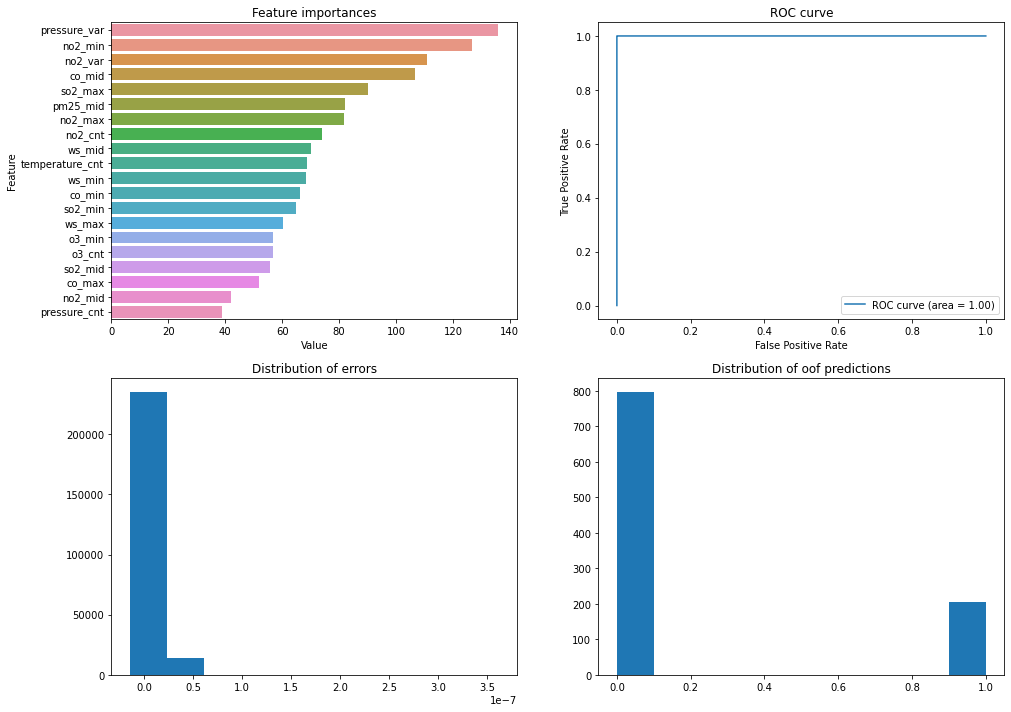

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
class Adversarial_validator:

    def __init__(self, train, test, features, categoricals):
        self.train = train
        self.test = test
        self.features = features
        self.categoricals = categoricals
        self.union_df = self.train_test_union(self.train, self.test)
        self.cv = self.get_cv()
        self.models = []
        self.oof_pred = self.fit()
        self.report_plot()

    def fit(self):
        oof_pred = np.zeros((len(self.union_df), ))

        for fold, (train_idx, val_idx) in enumerate(self.cv):
            x_train, x_predict = self.union_df[self.features].iloc[
                train_idx], self.union_df[self.features].iloc[val_idx]
            y_train = self.union_df['target'][train_idx]
            train_set = self.convert_dataset(x_train, y_train)
            model = self.train_model(train_set)
            self.models.append(model)

            oof_pred[val_idx] = model.predict(
                x_predict).reshape(oof_pred[val_idx].shape)
        self.union_df['prediction'] = oof_pred
        return oof_pred

    def train_test_union(self, train, test):
        train['target'] = 0
        test['target'] = 1
        return pd.concat([train, test], axis=0).reset_index(drop=True)

    def get_cv(self):
        cv = StratifiedKFold(n_splits=5,
                             shuffle=True, random_state=42)

        return cv.split(self.union_df, self.union_df['target'])

    def convert_dataset(self, X, y):
        return lgb.Dataset(X, label=y, categorical_feature=self.categoricals)

    def train_model(self, train_set):
        return lgb.train(self.get_params(), train_set)

    def get_params(self):
        param = {'num_leaves': 50,
                 'num_round': 100,
                 'min_data_in_leaf': 30,
                 'objective': 'binary',
                 'max_depth': 5,
                 'learning_rate': 0.2,
                 'min_child_samples': 20,
                 'boosting': 'gbdt',
                 'feature_fraction': 0.9,
                 'bagging_freq': 1,
                 'bagging_fraction': 0.9,
                 'bagging_seed': 44,
                 'verbose_eval': 50,
                 'metric': 'auc',
                 'verbosity': -1}
        return param

    def report_plot(self):
        fig, ax = plt.subplots(figsize=(16, 12))
        plt.subplot(2, 2, 1)
        self.plot_feature_importance()
        plt.subplot(2, 2, 2)
        self.plot_roc_curve()
        plt.subplot(2, 2, 3)
        plt.hist(self.union_df['target'] - self.oof_pred)
        plt.title('Distribution of errors')
        plt.subplot(2, 2, 4)
        plt.hist(np.random.choice(self.oof_pred, 1000, False))
        plt.title('Distribution of oof predictions')

    def get_feature_importance(self):
        n = len(self.models)
        feature_imp_df = pd.DataFrame()
        for i in range(n):
            tmp = pd.DataFrame(zip(self.models[i].feature_importance(
            ), self.features), columns=['Value', 'Feature'])
            tmp['n_models'] = i
            feature_imp_df = pd.concat([feature_imp_df, tmp])
            del tmp
        self.feature_importance = feature_imp_df
        return feature_imp_df

    def plot_feature_importance(self, n=20):
        imp_df = self.get_feature_importance().groupby(
            ['Feature'])[['Value']].mean().reset_index(False)
        imp_top_df = imp_df.sort_values('Value', ascending=False).head(n)
        sns.barplot(data=imp_top_df, x='Value', y='Feature', orient='h')
        plt.title('Feature importances')

    def plot_roc_curve(self):
        fpr, tpr, thresholds = metrics.roc_curve(
            self.union_df['target'], self.oof_pred)
        auc = metrics.auc(fpr, tpr)
        print("AUC:",auc)
        plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' % auc)
        plt.legend()
        plt.title('ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')

adv = Adversarial_validator(train, test, features, categoricals)